In [1]:
import pandas as pd
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Population Characteristics

In [39]:
df=pd.read_csv("../../../predictglaucomasurgery/cleanednolaserfilterednegs/predictglaucomasurgerystructnonstandard.csv")
df.head()

,pat_deid,age,gender,race,ethnicity,bcvalogmarod,bcvalogmaros,todmax,tosmax,todmissing,...,med_211278,med_211284,med_222884,med_229855,med_540147,med_540151,med_540507,med_540523,med_540619,surgery
0,1861,59.0,Male,Asian,Non-Hispanic,0.176091,0.176091,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2906,54.0,Male,White,Non-Hispanic,-0.000000,-0.000000,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,4722,45.0,Male,Other,Non-Hispanic,0.544068,-0.000000,32.0,27.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,18210,65.0,Male,Black,Non-Hispanic,0.096910,0.301030,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,19120,82.0,Female,White,Non-Hispanic,NaN,NaN,NaN,NaN,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [5]:
len(df.columns)

354

In [3]:
len(df)

4512

In [7]:
df["surgery"].mean()
df["surgery"].value_counts()

0.16578014184397163

0    3764
1     748
Name: surgery, dtype: int64

In [8]:
df["gender"].value_counts()

Female    2270
Male      2242
Name: gender, dtype: int64

In [14]:
df["race"].value_counts()

White               1892
Asian               1197
Other                982
Black                216
Unknown              188
Pacific Islander      28
Native American        9
Name: race, dtype: int64

In [15]:
df['ethnicity'].value_counts()

Non-Hispanic       3791
Hispanic/Latino     566
Unknown             155
Name: ethnicity, dtype: int64

In [9]:
df["age"].mean()
df["age"].std()

64.98160460992908

17.910696677141477

In [10]:
df["todmax"].mean()
df["todmax"].std()

18.333935018050543

12.346152800697384

In [11]:
df["tosmax"].mean()
df["tosmax"].std()

18.799065420560748

19.071303891769663

In [12]:
df["bcvalogmarod"].mean()
df["bcvalogmarod"].std()

0.3947919655421543

0.7432931862618459

In [13]:
df["bcvalogmaros"].mean()
df["bcvalogmaros"].std()

0.4285506789792744

0.7815310685695733

In [5]:
pd.crosstab(df["gender"], df["surgery"])

surgery,0,1
gender,,
Female,1920,350
Male,1844,398


In [6]:
pd.crosstab(df["race"], df["surgery"])

surgery,0,1
race,,
Asian,969,228
Black,168,48
Native American,7,2
Other,805,177
Pacific Islander,23,5
Unknown,176,12
White,1616,276


In [7]:
pd.crosstab(df["ethnicity"], df["surgery"])

surgery,0,1
ethnicity,,
Hispanic/Latino,460,106
Non-Hispanic,3159,632
Unknown,145,10


In [9]:
pd.crosstab(df["age"], df["surgery"])

surgery,0,1
age,,
1.0,1,0
2.0,4,0
4.0,0,2
5.0,8,0
6.0,5,0
...,...,...
102.0,1,0
103.0,0,1
104.0,1,0


In [12]:
df[["surgery", "age", "todmax", "tosmax", "bcvalogmarod", "bcvalogmaros"]].groupby(["surgery"]).mean()

,age,todmax,tosmax,bcvalogmarod,bcvalogmaros
surgery,,,,,
0,65.00797,18.009091,18.255119,0.387974,0.427553
1,64.84893,20.089595,21.750751,0.429911,0.433704


In [13]:
df[["surgery", "age", "todmax", "tosmax", "bcvalogmarod", "bcvalogmaros"]].groupby(["surgery"]).std()

,age,todmax,tosmax,bcvalogmarod,bcvalogmaros
surgery,,,,,
0,18.096060,6.204507,6.546934,0.739501,0.786178
1,16.958171,27.684256,45.823795,0.762088,0.757580


In [44]:
#count number of each kind of variable 
print('number of icd variables:', len([x for x in list(df.columns) if x.startswith('icd_')]))
print('number of med variables:', len([x for x in list(df.columns) if x.startswith('med_')]))

number of icd variables: 101
number of med variables: 241


# Explore glaucoma severity analyses

In [3]:
df=pd.read_csv("../../../predictglaucomasurgery/cleanednolaserfilterednegs/predictglaucomasurgerystructnonstandardallcodes.csv")
df.head()

,pat_deid,gender,race,ethnicity,age,icd_A15.0,icd_B00.50,icd_B00.51,icd_B00.52,icd_B02.30,...,med_540894,med_541011,med_541161,med_541454,med_541599,bcvalogmarod,bcvalogmaros,todmax,tosmax,surgery
0,1861,Male,Asian,Non-Hispanic,59.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.176091,0.176091,NaN,NaN,1
1,2906,Male,White,Non-Hispanic,54.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-0.000000,-0.000000,NaN,NaN,1
2,4722,Male,Other,Non-Hispanic,45.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.544068,-0.000000,32.0,27.0,1
3,18210,Male,Black,Non-Hispanic,65.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.096910,0.301030,NaN,NaN,1
4,19120,Female,White,Non-Hispanic,82.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,1


In [4]:
list(df.columns)

['pat_deid',
 'gender',
 'race',
 'ethnicity',
 'age',
 'icd_A15.0',
 'icd_B00.50',
 'icd_B00.51',
 'icd_B00.52',
 'icd_B02.30',
 'icd_B02.32',
 'icd_B19.20',
 'icd_C69.00',
 'icd_C69.20',
 'icd_C69.30',
 'icd_C69.40',
 'icd_C69.90',
 'icd_C88.0',
 'icd_D22.9',
 'icd_D23.9',
 'icd_D31.00',
 'icd_D31.30',
 'icd_D31.31',
 'icd_D31.32',
 'icd_D31.40',
 'icd_D35.2',
 'icd_D35.2, D35.3',
 'icd_D36.9',
 'icd_D48.5',
 'icd_D49.89',
 'icd_D64.9',
 'icd_D86.9',
 'icd_E03.9',
 'icd_E05.00',
 'icd_E08.351',
 'icd_E08.3513',
 'icd_E08.3519',
 'icd_E08.359',
 'icd_E08.3599',
 'icd_E10.351',
 'icd_E10.359',
 'icd_E10.39',
 'icd_E10.65',
 'icd_E10.9',
 'icd_E11.22',
 'icd_E11.311',
 'icd_E11.311, H35.81',
 'icd_E11.319',
 'icd_E11.329',
 'icd_E11.3292',
 'icd_E11.3299',
 'icd_E11.341',
 'icd_E11.3491',
 'icd_E11.351',
 'icd_E11.3511',
 'icd_E11.3513',
 'icd_E11.3519',
 'icd_E11.3521',
 'icd_E11.359',
 'icd_E11.3591',
 'icd_E11.3593',
 'icd_E11.3599',
 'icd_E11.36',
 'icd_E11.39',
 'icd_E11.39, E11.65

In [13]:
glaucdxlist=[x for x in list(df.columns) if x.startswith('icd_H40.')]

In [32]:
import re

In [33]:
r = re.compile("icd_H40\.[A-Za-z0-9]{3}[0-4]{1}")

In [34]:
glaucdxseveritylist=list(filter(r.match,glaucdxlist))

In [35]:
glaucdxseveritylist

['icd_H40.10X0',
 'icd_H40.10X0, H27.03',
 'icd_H40.10X1',
 'icd_H40.10X2',
 'icd_H40.10X3',
 'icd_H40.10X4',
 'icd_H40.1110',
 'icd_H40.1111',
 'icd_H40.1112',
 'icd_H40.1113',
 'icd_H40.1114',
 'icd_H40.1120',
 'icd_H40.1121',
 'icd_H40.1122',
 'icd_H40.1123',
 'icd_H40.1124',
 'icd_H40.1130',
 'icd_H40.1131',
 'icd_H40.1132',
 'icd_H40.1133',
 'icd_H40.1134',
 'icd_H40.1190',
 'icd_H40.1192',
 'icd_H40.1193',
 'icd_H40.1194',
 'icd_H40.11X0',
 'icd_H40.11X1',
 'icd_H40.11X2',
 'icd_H40.11X3',
 'icd_H40.11X4',
 'icd_H40.1222',
 'icd_H40.1230',
 'icd_H40.1232',
 'icd_H40.1233',
 'icd_H40.1290',
 'icd_H40.1292',
 'icd_H40.1293',
 'icd_H40.1330',
 'icd_H40.1332',
 'icd_H40.1333',
 'icd_H40.1390',
 'icd_H40.1490',
 'icd_H40.1491',
 'icd_H40.1492',
 'icd_H40.1493',
 'icd_H40.1494',
 'icd_H40.20X0',
 'icd_H40.20X1',
 'icd_H40.20X3',
 'icd_H40.20X4',
 'icd_H40.2210',
 'icd_H40.2212',
 'icd_H40.2213',
 'icd_H40.2214',
 'icd_H40.2220',
 'icd_H40.2222',
 'icd_H40.2223',
 'icd_H40.2224',
 'icd_

#create a column which indicates what the highest severity ever coded is 
- 0 - unspecified 
- 1 - mild 
- 2 - moderate
- 3 - severe 
- -1 - indeterminate 
- -2 - doesn't have a glaucoma diagnosis with a severity code 

In [138]:
dfglaucdx=df[["pat_deid"]+glaucdxseveritylist]

In [139]:
#produce a list of icd codes which are 1 for each patient 
dfglaucdx["presentseveritycodelist"]=dfglaucdx.apply(lambda row: list(row[row == 1].index), axis=1)

C:\Users\Sophia\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [142]:
r4thdigit = re.compile("icd_H40\.[A-Za-z0-9]{3}([0-4]){1}")

In [143]:
def highestseveritycode(severitycodelist): 
    if len(severitycodelist) == 0: 
        return -2
    if len(severitycodelist)>0: 
        severitylist=[]
        r4thdigit = re.compile("icd_H40\.[A-Za-z0-9]{3}([0-4]){1}")
        for severitycode in severitycodelist: 
            #extract 4th digit after decimal value for each code 
            severitylist.append(int(re.findall(r4thdigit, severitycode)[0]))
        #replace 4's (indeterminates) with new code for indeterminate, -1
        #then return the max over the remaining list to get highest coded known severity 
        return max([-1 if x == 4 else x for x in severitylist])

In [144]:
highestseveritycode(["icd_H40.10X0", "icd_H40.10X1", "icd_H40.10X2", "icd_H40.10X3", "icd_H40.10X4"])

3

In [145]:
dfglaucdx["severity"]=dfglaucdx["presentseveritycodelist"].apply(lambda x: highestseveritycode(x))

C:\Users\Sophia\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [146]:
dfglaucdx["severity"].value_counts()

-2    2573
 0    1120
 3     336
 2     277
 1     167
-1      39
Name: severity, dtype: int64

In [150]:
dfseverity=pd.merge(dfglaucdx[["pat_deid", "severity"]], df[["pat_deid", "surgery"]], on="pat_deid")

In [151]:
pd.crosstab(dfseverity["severity"], dfseverity["surgery"])

surgery,0,1
severity,,
-2,2170,403
-1,37,2
0,912,208
1,148,19
2,228,49
3,269,67


Unfortunately, over 80% of the cohort does not have a determinate severity code. These codes are highly unreliable. 
Glaucoma Severity							
	Mild - 1	167	3.7%	148	3.9%	19	2.5%
	Moderate - 2	277	6.1%	228	6.1%	49	6.6%
	Severe - 3 	336	7.4%	269	7.1%	67	9.0%
	Unavailable	3732	82.7%	3119	82.9%	613	82.0%
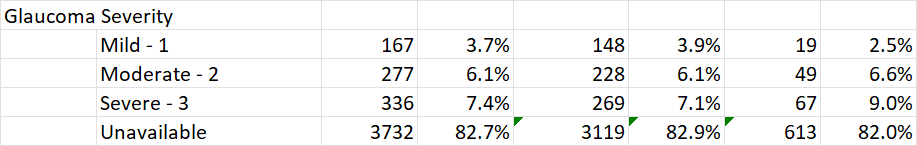

# Explore glaucoma meds 

In [35]:
#let's look at some common glaucoma medications 
def calcmeds(medlist, df): 
    print(pd.crosstab(df[medlist].any(1), df['surgery']))
    print('total # patients on this med: ', df[medlist].any(1).sum())
    return 
 
print('latanoprost')
lat=['med_77371', 'med_17442'] 
calcmeds(lat, df)

print('bimatoprost')
lum=['med_211278',
'med_211284',
'med_29901',
'med_83155']
calcmeds(lum, df)

print('timolol')
tim=['med_15111',
'med_90818',
'med_15112',
'med_88037',
'med_114914',
'med_40464',
'med_11561',
'med_7970',
'med_24575',
'med_11562',
'med_7971',
'med_12023',
'med_24576',
'med_125362',
'med_38874',
'med_22991',
'med_91540',
'med_222820',
'med_222947',
'med_223383',
'med_202894',
'med_202896',
'med_216320']
calcmeds(tim, df)

print('dorzolamide')
dorz=['med_22991',
'med_91540',
'med_222820',
'med_222947',
'med_223383',
'med_15016',
'med_95690']
calcmeds(dorz,df)

print('brimonidine')
brim=['med_229853',
'med_229855',
'med_202894',
'med_202896',
'med_216320',
'med_125837',
'med_70393',
'med_31161',
'med_95023',
'med_17881']
calcmeds(brim, df)

print("acetazolamide")
diamox=['med_112',
'med_113',
'med_38199',
'med_80001',
'med_167878',
'med_174506']
calcmeds(diamox, df)

latanoprost
surgery     0    1
row_0             
False    2485  457
True     1279  291
total # patients on this med:  1570
bimatoprost
surgery     0    1
row_0             
False    3453  646
True      311  102
total # patients on this med:  413
timolol
surgery     0    1
row_0             
False    2446  357
True     1318  391
total # patients on this med:  1709
dorzolamide
surgery     0    1
row_0             
False    3086  498
True      678  250
total # patients on this med:  928
brimonidine
surgery     0    1
row_0             
False    2873  427
True      891  321
total # patients on this med:  1212
acetazolamide
surgery     0    1
row_0             
False    3586  673
True      178   75
total # patients on this med:  253
